# Convolutional Neural Networks

## Happy Face Classification

Classify each picture as happy or not

In [0]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model, Sequential
from keras.preprocessing import image
from keras.optimizers import Adam, SGD
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import h5py
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn.model_selection import train_test_split
import time
import keras
%matplotlib inline



## Load Dataset Module

In [0]:
def load_dataset():
    path_to_train = "assignment3_train.h5"
    path_to_test = "assignment3_test.h5"
    train_dataset = h5py.File(path_to_train)
    train_x = np.array(train_dataset['train_set_x'][:])
    train_y = np.array(train_dataset['train_set_y'][:])

    test_dataset = h5py.File(path_to_test)
    test_x = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])

    # y reshaped
    train_y = train_y.reshape((1, train_x.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))

    return train_x, train_y, test_x, test_y  

## Model Creation Modules

In [0]:
def HappyModel(input_shape, reg):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
    dropOut = reg
    ### START CODE HERE ###
    X0 = Input(shape=input_shape)
    X = Conv2D(8, 3)(X0)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    X = Conv2D(16, 3)(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    X = MaxPooling2D()(X)
    X = Conv2D(32, 3)(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    X = Conv2D(64, 3)(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    X = MaxPooling2D()(X)
    X = Conv2D(128, 3)(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    X = Conv2D(256, 3)(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    X = MaxPooling2D()(X)
    X = Flatten()(X)
    X = Dense(1024)(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    if (reg):
      X = dropOut(X)
    X = Dense(128)(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    if (reg):
      X = dropOut(X)
    X = Dense(10)(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    if (reg):
      X = dropOut(X)
    X = Dense(1)(X)
    X = Activation('sigmoid')(X)
    ### END CODE HERE ###
    model = Model(inputs = X0, outputs = X)
    return model
def readyMadeModel(input_shape, arch, reg, freeze, weights):
    model = Sequential()
    X0 = Input(shape=input_shape)
    pre_model = arch(weights=weights, include_top=False, input_tensor=X0)
    if freeze:
      for layer in pre_model.layers:
        layer.trainable = False
    model.add(pre_model)
    model.add(Flatten())
    model.add(Dense(1024))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    if (reg):
      model.add(reg)
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    if (reg):
      model.add(reg)
    model.add(Dense(10))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    if (reg):
      model.add(reg)
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    return model
def vggRandomModel(input_shape, reg):
    return readyMadeModel(input_shape, keras.applications.VGG16, reg, None, None)
def vggPretrainedModel(input_shape, reg):
    return readyMadeModel(input_shape, keras.applications.VGG16, reg, None, 'imagenet')
def vggFrozenModel(input_shape, reg):
    return readyMadeModel(input_shape, keras.applications.VGG16, reg, True, 'imagenet')
def resRandomModel(input_shape, reg):
    return readyMadeModel(input_shape, keras.applications.ResNet50, reg, None, None)
def resPretrainedModel(input_shape, reg):
    return readyMadeModel(input_shape, keras.applications.ResNet50, reg, None, 'imagenet')
def resFrozenModel(input_shape, reg):
    return readyMadeModel(input_shape, keras.applications.ResNet50, reg, True, 'imagenet')

## Experiment code to be able to run different configurations

In [0]:
def run_experiment(build_model, optimizer, X, y, verbose = 0, reg = None):
  #Create, compile and fit the model
  ### START CODE HERE ### 
  model = build_model(X.shape[1:], reg)
  BATCH_SIZE = 64
  EPOCHS = 30
  train_X, val_X, train_y, val_y = train_test_split(X, y, train_size=0.8, random_state=3)
  
  model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=optimizer)
  
  start = time.time()
  history = model.fit(train_X, train_y, verbose=verbose, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data = (val_X, val_y) )
  end = time.time()
  
  #model.summary()
  
  # Plot training & validation accuracy values
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()
  print('Last validation loss : ', history.history['val_loss'][-1], ' | last training loss : ', history.history['loss'][-1])
  print('Last validation accuracy : ', history.history['val_acc'][-1], ' | last training accuracy : ', history.history['acc'][-1])
  print('Time taken in training : ', end - start, ' sec')
  return model, history.history['val_acc'][-1]

## Get best configuration from model dictionary according to highest validation accuracy

In [0]:
def get_best_configuration(models):
  maxVal = 0
  maxkey = ''
  for key,(model, value) in models.items():
    if (value > maxVal):
      maxkey = key
      maxVal = value
  return maxkey

## Model Evaluation Code

In [0]:
def evaluate_model(model, test_X, test_y):
  BATCH_SIZE = 64
  start = time.time()
  test_loss, test_acc = model.evaluate(test_X, test_y, verbose = 0, batch_size = BATCH_SIZE)
  end = time.time()
  print('Test loss:', test_loss)
  print('Test accuracy:', test_acc)
  print('Time taken in testing : ', end - start, ' sec')

## Dataset Setup

In [0]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1npiX3A9S8wGzVeK-r1iRLCCcLxDubUN_' -O assignment3_train.h5
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=17zOTEwEDjSqIYNvDpZokbCdE5IfcRGQ0' -O assignment3_test.h5

--2019-03-19 15:13:54--  https://docs.google.com/uc?export=download&id=1npiX3A9S8wGzVeK-r1iRLCCcLxDubUN_
Resolving docs.google.com (docs.google.com)... 173.194.76.101, 173.194.76.113, 173.194.76.100, ...
Connecting to docs.google.com (docs.google.com)|173.194.76.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-2o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ldu219bftt65ku5d29tnpip9mssuqlkj/1553004000000/10632806613498870968/*/1npiX3A9S8wGzVeK-r1iRLCCcLxDubUN_?e=download [following]
--2019-03-19 15:13:55--  https://doc-0o-2o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ldu219bftt65ku5d29tnpip9mssuqlkj/1553004000000/10632806613498870968/*/1npiX3A9S8wGzVeK-r1iRLCCcLxDubUN_?e=download
Resolving doc-0o-2o-docs.googleusercontent.com (doc-0o-2o-docs.googleusercontent.com)... 64.233.166.132, 2a00:1450:400c:c09::84
Connecting to doc-0o-2o-docs.googleusercontent.com (doc-0o-2o-d

In [0]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))


number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


## My Own Model Experiments

In [0]:
own_models = {}

### Adam optimizer with no regularization

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


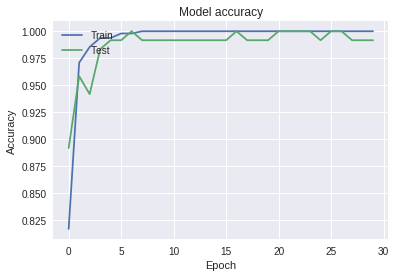

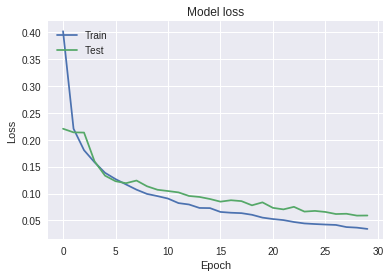

Last validation loss :  0.05926012049118678  | last training loss :  0.03435696723560492
Last validation accuracy :  0.9916666706403097  | last training accuracy :  1.0
Time taken in training :  22.90810775756836  sec


In [0]:
own_models['adam'] = run_experiment(HappyModel, 'adam', X_train, Y_train, reg = None)

### SGD with no regularization

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


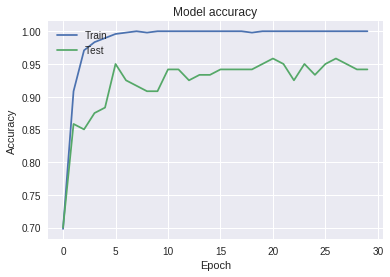

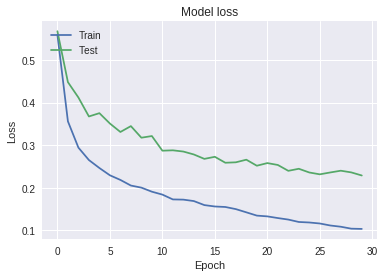

Last validation loss :  0.22874051133791606  | last training loss :  0.10331180095672607
Last validation accuracy :  0.9416666587193807  | last training accuracy :  1.0
Time taken in training :  15.510132074356079  sec


In [0]:
own_models['sgd'] = run_experiment(HappyModel, 'sgd', X_train, Y_train, reg = None)


### SGD with dropout 0.1

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


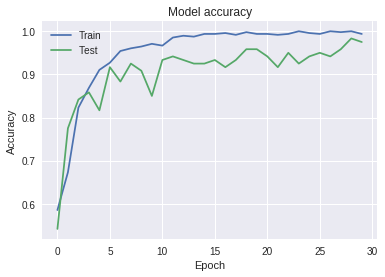

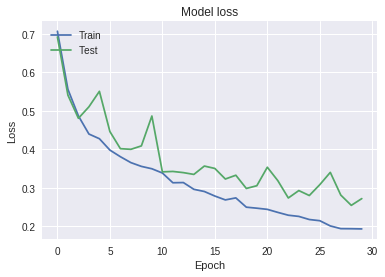

Last validation loss :  0.27181931138038634  | last training loss :  0.1929614762465159
Last validation accuracy :  0.975000003973643  | last training accuracy :  0.99375
Time taken in training :  16.427168130874634  sec


In [0]:
own_models['sgd_reg_0.1'] = run_experiment(HappyModel, 'sgd', X_train, Y_train, reg = Dropout(0.1))

### Adam with dropout 0.1

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


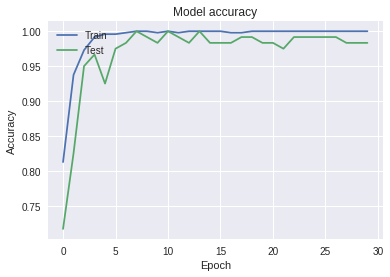

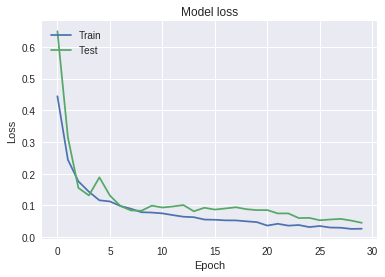

Last validation loss :  0.045274718105793  | last training loss :  0.026634192715088528
Last validation accuracy :  0.9833333412806193  | last training accuracy :  1.0
Time taken in training :  20.770641326904297  sec


In [0]:
own_models['adam_reg_0.1'] = run_experiment(HappyModel, 'adam', X_train, Y_train, reg = Dropout(0.1))

### Adam with learning rate 0.0005 and dropout of 0.1

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


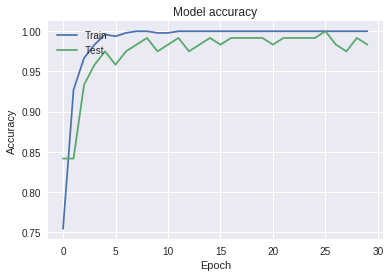

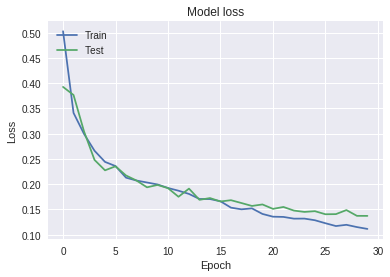

Last validation loss :  0.13722081283728282  | last training loss :  0.11141195893287659
Last validation accuracy :  0.9833333373069764  | last training accuracy :  1.0
Time taken in training :  21.344122648239136  sec


In [0]:
own_models['adam_0.0005_reg_0.1'] = run_experiment(HappyModel, Adam(0.0005), X_train, Y_train, reg = Dropout(0.1))

### Adam with dropout of 0.2

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


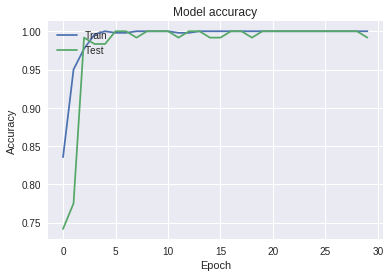

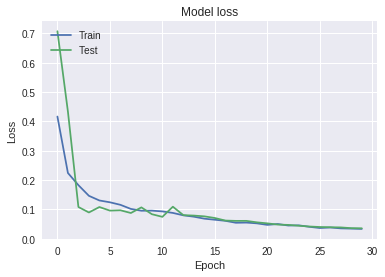

Last validation loss :  0.035838225732247035  | last training loss :  0.033678125217556955
Last validation accuracy :  0.9916666706403097  | last training accuracy :  1.0
Time taken in training :  23.077411890029907  sec


In [0]:
own_models['adam_reg_0.2'] = run_experiment(HappyModel, 'adam', X_train, Y_train, reg = Dropout(0.1))

## Best Model Configuration Evaluation

In [0]:
key = get_best_configuration(own_models)
values = own_models[key]
print(key, ' has the best validation accuracy ', values[1])
evaluate_model(values[0], X_test, Y_test)
values[0].summary()

adam  has the best validation accuracy  0.9916666706403097
Test loss: 0.13254612962404888
Test accuracy: 0.9733333333333334
Time taken in training :  0.06115984916687012  sec
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 8)         224       
_________________________________________________________________
batch_normalization_1 (Batch (None, 62, 62, 8)         32        
_________________________________________________________________
activation_1 (Activation)    (None, 62, 62, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 16)        1168      
_________________________________________________________________
batch_normalization_2 (Batch (Non

## Ready-Made Architectures To Test

In [79]:
keras.applications.VGG16(include_top = False, input_shape = X_train.shape[1:]).summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputLayer)        (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
__________

In [80]:
keras.applications.ResNet50(include_top = False, input_shape = X_train.shape[1:]).summary()

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_32 (InputLayer)           (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 70, 70, 3)    0           input_32[0][0]                   
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 32, 32, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 32, 32, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

## VGG16 Random Weights

In [0]:
vgg16rand_models = {}

### Adam with no regularization

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


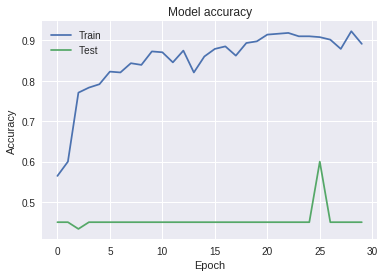

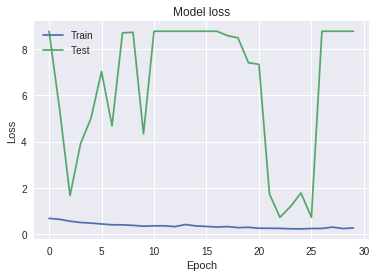

Last validation loss :  8.76831251780192  | last training loss :  0.26418410539627074
Last validation accuracy :  0.450000003973643  | last training accuracy :  0.8916666666666667
Time taken in training :  61.81681704521179  sec


In [28]:
vgg16rand_models['adam'] = run_experiment(vggRandomModel, 'adam', X_train, Y_train, None)

### Adam with dropout 0.2

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


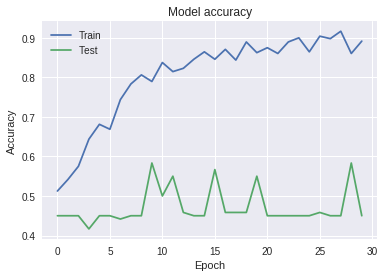

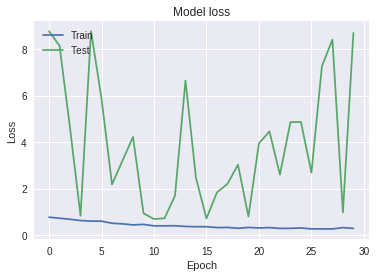

Last validation loss :  8.696052678426106  | last training loss :  0.2881815175215403
Last validation accuracy :  0.450000003973643  | last training accuracy :  0.8916666666666667
Time taken in training :  58.463088035583496  sec


In [29]:
vgg16rand_models['adam_reg_0.2'] = run_experiment(vggRandomModel, 'adam', X_train, Y_train, reg = Dropout(0.2))

### Adam with dropout 0.3

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


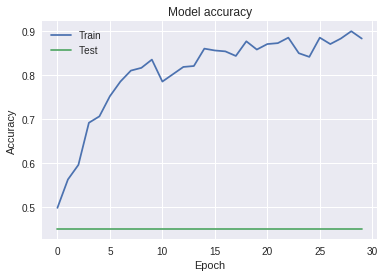

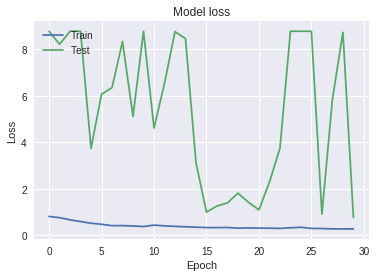

Last validation loss :  0.7715803146362304  | last training loss :  0.2827335476875305
Last validation accuracy :  0.450000003973643  | last training accuracy :  0.8833333333333333
Time taken in training :  60.77504563331604  sec


In [33]:
vgg16rand_models['adam_reg_0.3'] = run_experiment(vggRandomModel, 'adam', X_train, Y_train, reg = Dropout(0.3))

## VGG16 random weight evaluation

In [36]:
key = get_best_configuration(vgg16rand_models)
values = vgg16rand_models[key]
print(key, ' has the best validation accuracy ', values[1])
evaluate_model(values[0], X_test, Y_test)
values[0].summary()

adam  has the best validation accuracy  0.450000003973643
Test loss: 7.014649410247802
Test accuracy: 0.5599999984105428
Time taken in training :  0.18044710159301758  sec
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten_10 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_70 (Batc (None, 1024)              4096      
_________________________________________________________________
activation_79 (Activation)   (None, 1024)              0         
_________________________________________________________________
dense_38 (Dense)             (None, 

## VGG16 Pretrained weights fine tuning

In [0]:
vgg16pre_models = {}

### Adam with no regularization

58892288/58889256 [==============================] - 2s 0us/step


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


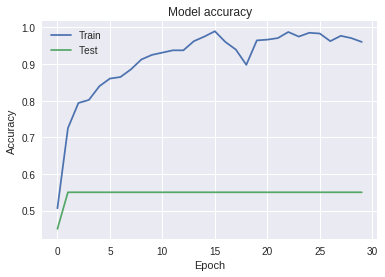

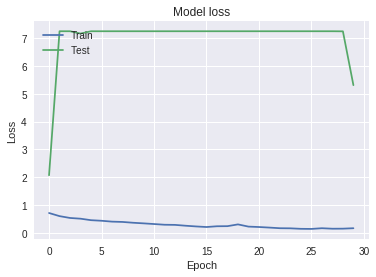

Last validation loss :  5.312934684753418  | last training loss :  0.16299729247887929
Last validation accuracy :  0.549999996026357  | last training accuracy :  0.9604166666666667
Time taken in training :  60.35627555847168  sec


In [39]:
vgg16pre_models['adam'] = run_experiment(vggPretrainedModel, 'adam', X_train, Y_train, None)

### Adam with dropout 0.1

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


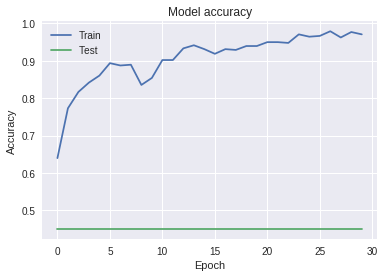

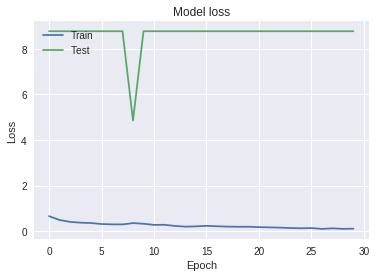

Last validation loss :  8.76831251780192  | last training loss :  0.10664428571859995
Last validation accuracy :  0.450000003973643  | last training accuracy :  0.9708333333333333
Time taken in training :  61.50760507583618  sec


In [40]:
vgg16pre_models['adam_reg_0.1'] = run_experiment(vggPretrainedModel, 'adam', X_train, Y_train, reg = Dropout(0.1))

### Adam with dropout 0.2

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


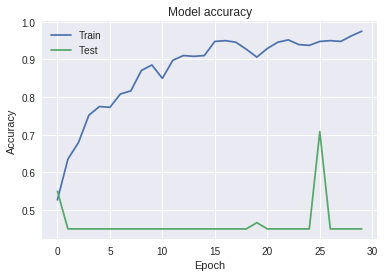

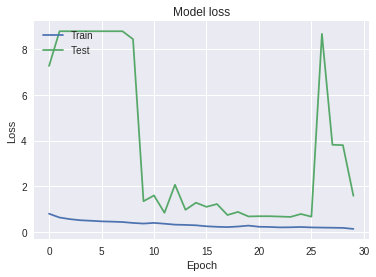

Last validation loss :  1.58972225189209  | last training loss :  0.14599006871382395
Last validation accuracy :  0.450000003973643  | last training accuracy :  0.975
Time taken in training :  62.15153980255127  sec


In [41]:
vgg16pre_models['adam_reg_0.2'] = run_experiment(vggPretrainedModel, 'adam', X_train, Y_train, reg = Dropout(0.2))

## VGG16 Pretrained Model fine tuning Evaluation

In [42]:
key = get_best_configuration(vgg16pre_models)
values = vgg16pre_models[key]
print(key, ' has the best validation accuracy ', values[1])
evaluate_model(values[0], X_test, Y_test)
values[0].summary()

adam  has the best validation accuracy  0.549999996026357
Test loss: 6.6860498046875
Test accuracy: 0.4400000015894572
Time taken in training :  0.1555318832397461  sec
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten_14 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_53 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_82 (Batc (None, 1024)              4096      
_________________________________________________________________
activation_95 (Activation)   (None, 1024)              0         
_________________________________________________________________
dense_54 (Dense)             (None, 128

## VGG16 Pretrained weights freezing

In [0]:
vgg16fre_models = {}

### Adam with no regularization

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


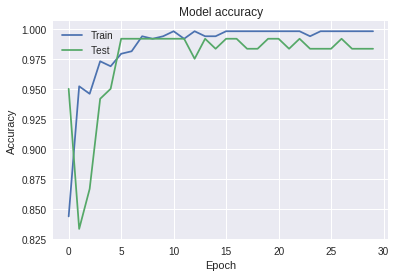

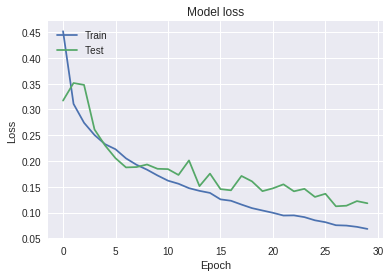

Last validation loss :  0.118003448843956  | last training loss :  0.06820947776238123
Last validation accuracy :  0.9833333412806193  | last training accuracy :  0.9979166666666667
Time taken in training :  30.77910852432251  sec


In [45]:
vgg16fre_models['adam'] = run_experiment(vggFrozenModel, 'adam', X_train, Y_train, None)

### Adam with dropout 0.1

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


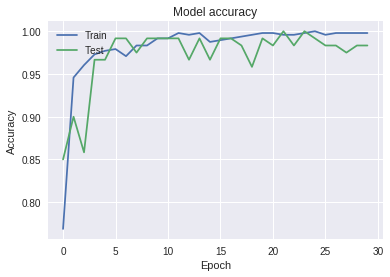

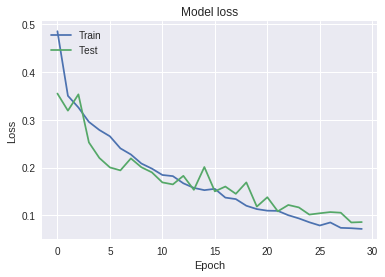

Last validation loss :  0.08579323341449102  | last training loss :  0.07145797461271286
Last validation accuracy :  0.9833333412806193  | last training accuracy :  0.9979166666666667
Time taken in training :  32.99448490142822  sec


In [46]:
vgg16fre_models['adam_reg_0.1'] = run_experiment(vggFrozenModel, 'adam', X_train, Y_train, reg = Dropout(0.1))

### Adam with dropout 0.2

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


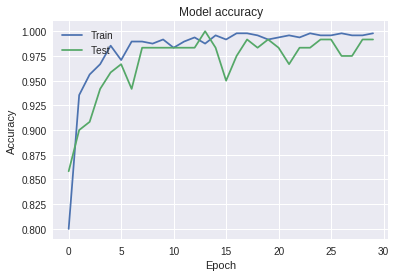

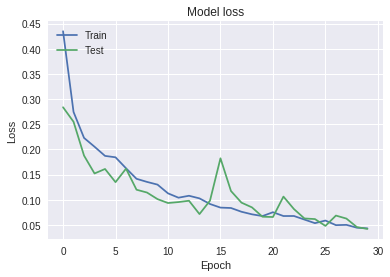

Last validation loss :  0.04188982769846916  | last training loss :  0.043022305021683374
Last validation accuracy :  0.9916666706403097  | last training accuracy :  0.9979166666666667
Time taken in training :  33.595261335372925  sec


In [47]:
vgg16fre_models['adam_reg_0.2'] = run_experiment(vggFrozenModel, 'adam', X_train, Y_train, reg = Dropout(0.2))

## VGG16 Pretrained weights freezing evaluation

In [48]:
key = get_best_configuration(vgg16fre_models)
values = vgg16fre_models[key]
print(key, ' has the best validation accuracy ', values[1])
evaluate_model(values[0], X_test, Y_test)
values[0].summary()

adam_reg_0.2  has the best validation accuracy  0.9916666706403097
Test loss: 0.09155232449372609
Test accuracy: 0.9799999976158142
Time taken in training :  0.15973424911499023  sec
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten_19 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_73 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_97 (Batc (None, 1024)              4096      
_________________________________________________________________
activation_115 (Activation)  (None, 1024)              0         
_________________________________________________________________
dropout_12 (Dropout)     

## Resnet random weights

In [0]:
resrand_models = {}

### Adam with no regularization

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


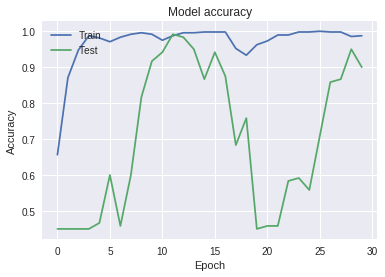

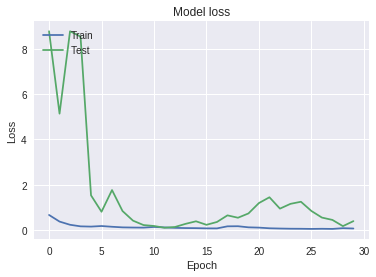

Last validation loss :  0.39184685945510866  | last training loss :  0.0667158583799998
Last validation accuracy :  0.900000007947286  | last training accuracy :  0.9875
Time taken in training :  137.04722332954407  sec


In [61]:
resrand_models['adam'] = run_experiment(resRandomModel, 'adam', X_train, Y_train, None)

### Adam with dropout 0.1

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


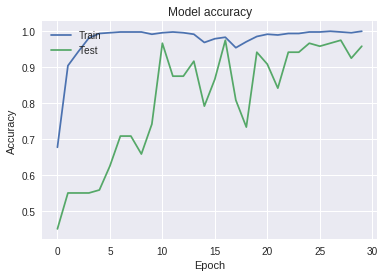

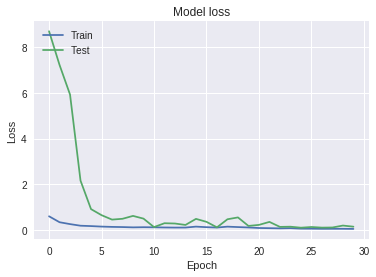

Last validation loss :  0.1516560157140096  | last training loss :  0.053662563860416415
Last validation accuracy :  0.9583333452542623  | last training accuracy :  1.0
Time taken in training :  136.7334589958191  sec


In [62]:
resrand_models['adam_reg_0.1'] = run_experiment(resRandomModel, 'adam', X_train, Y_train, reg = Dropout(0.1))

### Adam with dropout 0.2

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


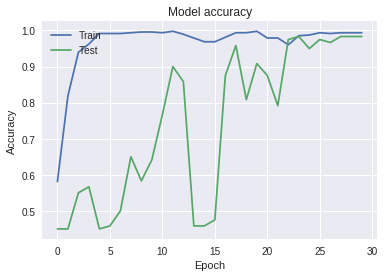

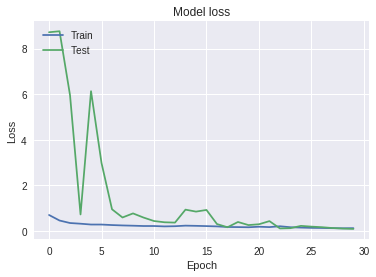

Last validation loss :  0.07814410378535588  | last training loss :  0.11152187685171763
Last validation accuracy :  0.9833333373069764  | last training accuracy :  0.99375
Time taken in training :  147.91048502922058  sec


In [63]:
resrand_models['adam_reg_0.2'] = run_experiment(resRandomModel, 'adam', X_train, Y_train, reg = Dropout(0.2))

## ResNet random weights evaluation

In [64]:
key = get_best_configuration(resrand_models)
values = resrand_models[key]
print(key, ' has the best validation accuracy ', values[1])
evaluate_model(values[0], X_test, Y_test)
values[0].summary()

adam_reg_0.2  has the best validation accuracy  0.9833333373069764
Test loss: 0.20795556545257568
Test accuracy: 0.940000003973643
Time taken in training :  0.6499612331390381  sec
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2, 2, 2048)        23587712  
_________________________________________________________________
flatten_22 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_85 (Dense)             (None, 1024)              8389632   
_________________________________________________________________
batch_normalization_106 (Bat (None, 1024)              4096      
_________________________________________________________________
activation_274 (Activation)  (None, 1024)              0         
_________________________________________________________________
dropout_15 (Dropout)       

## Resnet Pretrained weights fine tuning

In [0]:
respre_models = {}

### Adam with no regularization

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 4s 0us/step


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


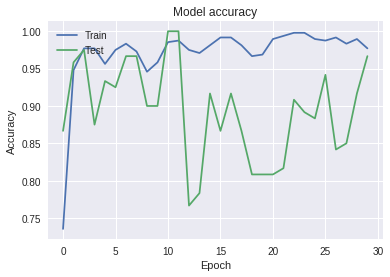

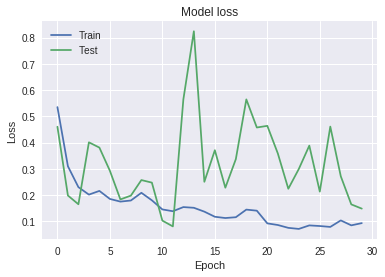

Last validation loss :  0.14812135050694147  | last training loss :  0.09283922662337621
Last validation accuracy :  0.9666666706403096  | last training accuracy :  0.9770833333333333
Time taken in training :  154.03893995285034  sec


In [67]:
respre_models['adam'] = run_experiment(resPretrainedModel, 'adam', X_train, Y_train, None)

### Adam with dropout 0.1

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


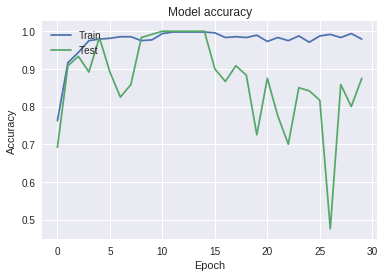

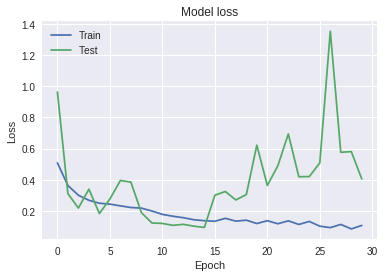

Last validation loss :  0.4052174429098765  | last training loss :  0.10711206595102946
Last validation accuracy :  0.875000003973643  | last training accuracy :  0.9791666666666666
Time taken in training :  157.12889456748962  sec


In [68]:
respre_models['adam_reg_0.1'] = run_experiment(resPretrainedModel, 'adam', X_train, Y_train, reg = Dropout(0.1))

### Adam with dropout 0.2

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


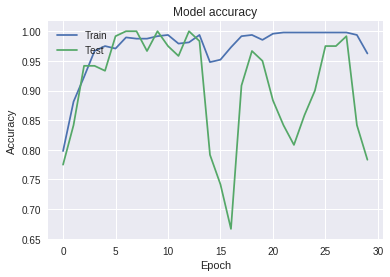

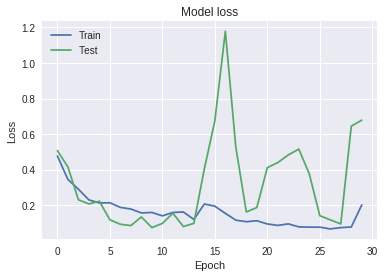

Last validation loss :  0.6784592628479004  | last training loss :  0.20142758140961328
Last validation accuracy :  0.7833333333333333  | last training accuracy :  0.9625
Time taken in training :  168.19341349601746  sec


In [69]:
respre_models['adam_reg_0.2'] = run_experiment(resPretrainedModel, 'adam', X_train, Y_train, reg = Dropout(0.2))

## ResNet pretrained weights fine tuning evaluation

In [70]:
key = get_best_configuration(respre_models)
values = respre_models[key]
print(key, ' has the best validation accuracy ', values[1])
evaluate_model(values[0], X_test, Y_test)
values[0].summary()

adam  has the best validation accuracy  0.9666666706403096
Test loss: 0.2714662683010101
Test accuracy: 0.9266666642824809
Time taken in training :  0.2236461639404297  sec
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2, 2, 2048)        23587712  
_________________________________________________________________
flatten_23 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_89 (Dense)             (None, 1024)              8389632   
_________________________________________________________________
batch_normalization_109 (Bat (None, 1024)              4096      
_________________________________________________________________
activation_327 (Activation)  (None, 1024)              0         
_________________________________________________________________
dense_90 (Dense)             (None,

## Resnet Pretrained weights freezing

In [0]:
resfre_models = {}

### Adam with no regularization

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


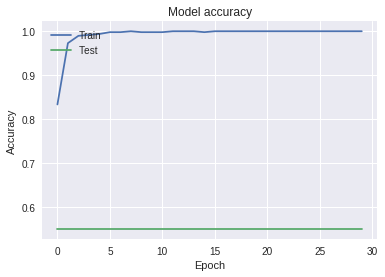

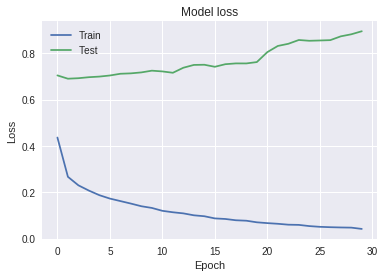

Last validation loss :  0.894417421023051  | last training loss :  0.04201528529326121
Last validation accuracy :  0.549999996026357  | last training accuracy :  1.0
Time taken in training :  91.30969905853271  sec


In [73]:
resfre_models['adam'] = run_experiment(resFrozenModel, 'adam', X_train, Y_train, None)

### Adam with dropout 0.1

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


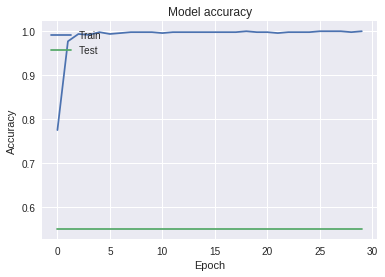

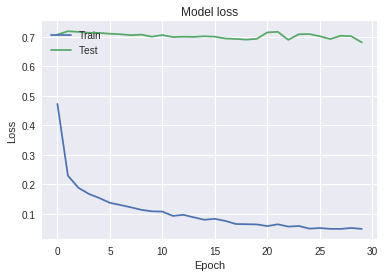

Last validation loss :  0.6813619057337443  | last training loss :  0.04897855967283249
Last validation accuracy :  0.549999996026357  | last training accuracy :  1.0
Time taken in training :  104.12866377830505  sec


In [74]:
resfre_models['adam_reg_0.1'] = run_experiment(resFrozenModel, 'adam', X_train, Y_train, reg = Dropout(0.1))

### Adam with dropout 0.2

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


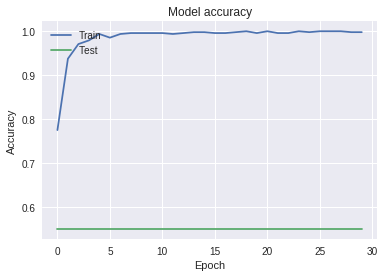

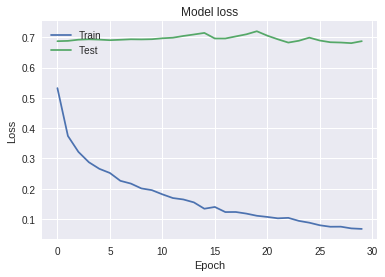

Last validation loss :  0.6869705080986023  | last training loss :  0.06770128806432088
Last validation accuracy :  0.549999996026357  | last training accuracy :  0.9979166666666667
Time taken in training :  108.9659640789032  sec


In [75]:
resfre_models['adam_reg_0.2'] = run_experiment(resFrozenModel, 'adam', X_train, Y_train, reg = Dropout(0.2))

## ResNet Pretrained weights freezing evaluation

In [76]:
key = get_best_configuration(resfre_models)
values = resfre_models[key]
print(key, ' has the best validation accuracy ', values[1])
evaluate_model(values[0], X_test, Y_test)
values[0].summary()

adam  has the best validation accuracy  0.549999996026357
Test loss: 1.0673914003372191
Test accuracy: 0.4400000015894572
Time taken in training :  0.2616109848022461  sec
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2, 2, 2048)        23587712  
_________________________________________________________________
flatten_26 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_101 (Dense)            (None, 1024)              8389632   
_________________________________________________________________
batch_normalization_118 (Bat (None, 1024)              4096      
_________________________________________________________________
activation_486 (Activation)  (None, 1024)              0         
_________________________________________________________________
dense_102 (Dense)            (None, 

---
# Conclusion
* Time taken to train:
  * My Model : 20 second
  * VGG16 whole network : 60 second
  * VGG16 freezed and train final layers only : 30 second
  * Resnet whole network : 130-150 second
  * Resnet freezed and train final layers only : 90 second
* Test accuracies:
  * My model : 97.33%
  * VGG16 Random : 55.99%
  * VGG16 Initial Pretrained Weights : 44%
  * VGG16 Frozen : 97.77%
  * Resnet Random : 94%
  * Resnet Initial Pretrained Weights : 92.66%
  * Resnet Frozen : 44%
* Trainable Parameters:
  * My Model : 4.7 Million
  * VGG16 whole Network : 17 Million approximatly
  * VGG16 frozen : 2.2 Million
  * Resnet whole Network : 32 Million
  * Resnet frozen : 8.5 Million
* Adam works much better than SGD for this problem.
* Adding dropout helps a lot at getting the best performance due to its prevention of overfitting since the training set is quite small.
* VGG is very usefull when we freeze its convolutional layers, and bad if we try to train on our small dataset which is the opposite of Resnet which did quite well when trained from scratch and did badly when we froze its layers. Maybe removing the freezing on some of the last layers would help.